(600, 480, 3)
101
201
38


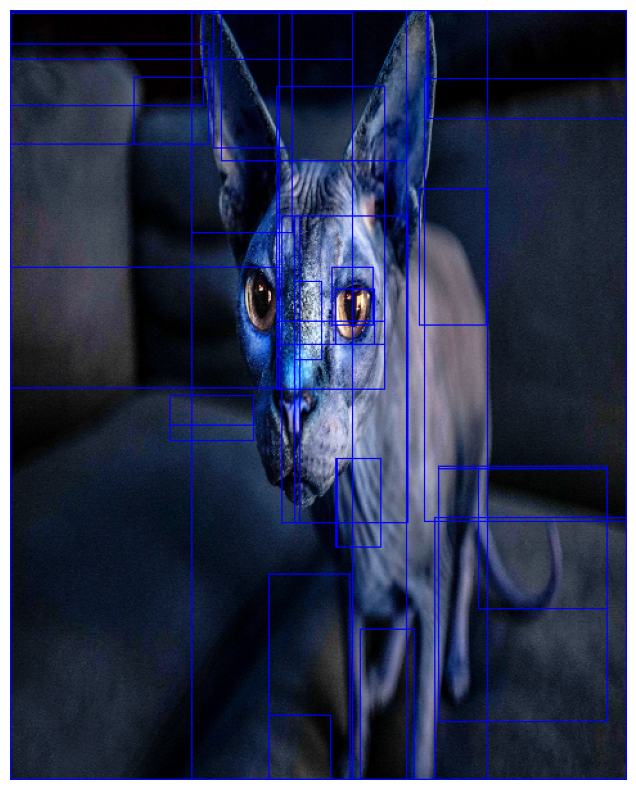

In [43]:

import skimage.data
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import selectivesearch
import numpy as np
import cv2
 
# 加载图片数据
#img = skimage.data.checkerboard() 
img_path ='./Baidu/cat1/1cat.jpg'
img = cv2.imread(img_path,-1)#(h,w)
img = cv2.resize(img,(480,600))
print(img.shape)
img = np.uint8(img)

img_lbl, regions = selectivesearch.selective_search(img, scale=300, sigma=0.8, min_size=50)
#print(regions)
#计算一共分割了多少个原始候选区域
temp = set()
for i in range(img_lbl.shape[0]):
    for j in range(img_lbl.shape[1]):    
        temp.add(img_lbl[i,j,3]) 
print(len(temp))
 
print(len(regions))#计算利用Selective Search算法得到了多少个候选区域
 
#创建一个集合 元素list(左上角x，左上角y,宽,高)
candidates = set()
for r in regions:
    if r['rect'] in candidates:#排除重复的候选区
        continue
    if r['size'] < 500:#排除小于 2000 pixels的候选区域(并不是bounding box中的区域大小)  
        continue
    x, y, w, h = r['rect']
    if w > 3 * h or h  > 3 * w : #排除扭曲的候选区域边框  即只保留近似正方形的
        continue
    candidates.add(r['rect'])
print(len(candidates))
for x, y, w, h in candidates:
    #print(x, y, w, h)
    cv2.rectangle(img, (x, y), ( x+w,y+h), (0, 0, 255), 1) 
    
plt.figure(figsize=(12,10))
plt.imshow(img)
plt.axis('off')
plt.savefig('ss.png')
plt.show()
